In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data_sale_moeinmal.csv', header=None)
columns = ['date', 'id_prd_to_plc', 'id_br','amount', 'price']
df.columns = columns
df.head()


df['total_price'] = df['price'] * df['amount']


def make_year(column):
    year = column.split('-')[0]
    return int(year)

def make_month(column):
    month = column.split('-')[1]
    return int(month)


def make_day(column):
    day = column.split('-')[2][0:2]
    return int(day)

def make_date(column):
    date = column.split(" ")[0]
    return date

df['year'] = df['date'].apply(make_year)
df['month'] = df['date'].apply(make_month)
df['day'] = df['date'].apply(make_day)
df['date'] = df['date'].apply(make_date)

def convert_prd(column):
  if column == 401:
    return 1397
  if column == 901:
    return 1398
  if column == 1001:
    return 1399
  if column == 1101:
    return 1400
  if column == 1201:
    return 1401
  elif column == 1301:
    return 1402


df['id_prd_to_plc'] = df['id_prd_to_plc'].apply(convert_prd)
df.head(-5)

,date,id_prd_to_plc,id_br,amount,price,total_price,year,month,day
0,2018-11-18,1397,51138,1.0,1930000.0,1930000.0,2018,11,18
1,2018-11-18,1397,51138,1.0,1230000.0,1230000.0,2018,11,18
2,2018-11-18,1397,51138,1.0,1930000.0,1930000.0,2018,11,18
3,2018-11-18,1397,51138,1.0,1250000.0,1250000.0,2018,11,18
4,2018-11-18,1397,51138,1.0,2100000.0,2100000.0,2018,11,18
...,...,...,...,...,...,...,...,...,...
26039,2023-08-27,1402,51138,1.0,9400000.0,9400000.0,2023,8,27
26040,2023-08-27,1402,51138,1.0,6400000.0,6400000.0,2023,8,27
26041,2023-08-27,1402,51138,1.0,11550000.0,11550000.0,2023,8,27
26042,2023-08-28,1402,51138,1.0,5950000.0,5950000.0,2023,8,28


In [26]:
# Create date column for splitting
df['date'] = df['date'] +'-'+ df['id_prd_to_plc'].astype(str)

#Group by day
new_data = df.groupby(df['date'], as_index=False).sum(numeric_only=True)
new_data['id_br'] = 51238
# new_data = new_data.drop('id_inv', axis=1)
new_data.head()
def make_prd(column):
  id_prd = column.split('-')[3]
  return int(id_prd)

# Create again columns after make new df for each day sales
new_data['id_br'] = new_data['id_br'].astype(int)
new_data = new_data.drop(['year', 'month', 'day'], axis=1)
new_data['year'] = new_data['date'].apply(make_year)
new_data['month'] = new_data['date'].apply(make_month)
new_data['day'] = new_data['date'].apply(make_day)
new_data['id_prd_to_plc'] = new_data['date'].apply(make_prd)

new_data.head()

,date,id_prd_to_plc,id_br,amount,price,total_price,year,month,day
0,2018-11-18-1397-1397,1397,51238,24.0,49490000.0,49490000.0,2018,11,18
1,2018-11-19-1397-1397,1397,51238,1.0,2100000.0,2100000.0,2018,11,19
2,2018-11-20-1397-1397,1397,51238,3.0,9670000.0,9670000.0,2018,11,20
3,2018-11-21-1397-1397,1397,51238,6.0,20930000.0,20930000.0,2018,11,21
4,2018-11-22-1397-1397,1397,51238,12.0,38750000.0,38750000.0,2018,11,22


<Axes: >

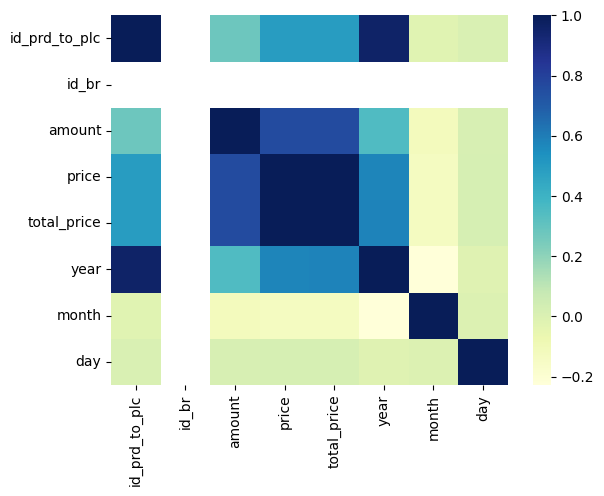

In [27]:
sns.heatmap(new_data.drop("date", axis=1).corr(), cmap='YlGnBu')

In [135]:
X = new_data[['id_prd_to_plc', 'year', 'month', 'day']]
y = new_data['total_price']

## Set Normalize

In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Create model

In [138]:
from sklearn.ensemble import RandomForestRegressor
modelRFR = RandomForestRegressor(n_estimators=2000)
modelRFR.fit(X_train, y_train)

RandomForestRegressor(n_estimators=2000)

## Evaluation Model

In [139]:
preds_rfr = modelRFR.predict(X_test)

In [140]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(preds_rfr, y_test)
np.sqrt(error)

53477634.478465304

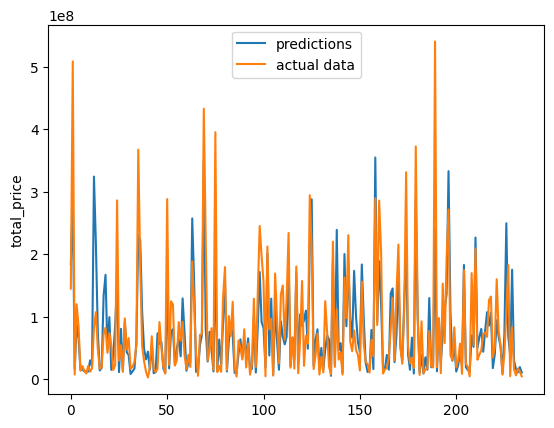

In [141]:
sns.lineplot(x=range(len(preds_rfr)), y=preds_rfr, label='predictions')
sns.lineplot(x=range(len(preds_rfr)), y=y_test, label='actual data')
plt.legend()

### Create data for test

In [142]:
new_data.head(-5)

,date,id_prd_to_plc,id_br,amount,price,total_price,year,month,day
0,2018-11-18-1397-1397,1397,51238,24.0,49490000.0,49490000.0,2018,11,18
1,2018-11-19-1397-1397,1397,51238,1.0,2100000.0,2100000.0,2018,11,19
2,2018-11-20-1397-1397,1397,51238,3.0,9670000.0,9670000.0,2018,11,20
3,2018-11-21-1397-1397,1397,51238,6.0,20930000.0,20930000.0,2018,11,21
4,2018-11-22-1397-1397,1397,51238,12.0,38750000.0,38750000.0,2018,11,22
...,...,...,...,...,...,...,...,...,...
1551,2023-08-19-1402-1402,1402,51238,14.0,132200000.0,132200000.0,2023,8,19
1552,2023-08-20-1402-1402,1402,51238,5.0,32810000.0,32810000.0,2023,8,20
1553,2023-08-21-1402-1402,1402,51238,13.0,118490000.0,118490000.0,2023,8,21
1554,2023-08-22-1402-1402,1402,51238,9.0,96230000.0,96230000.0,2023,8,22


In [203]:
month = new_data.iloc[1056: 1087]
month.head()

,date,id_prd_to_plc,id_br,amount,price,total_price,year,month,day
1056,2022-04-04-1401-1401,1401,51238,9.0,50950000.0,50950000.0,2022,4,4
1057,2022-04-05-1401-1401,1401,51238,4.0,28800000.0,28800000.0,2022,4,5
1058,2022-04-06-1401-1401,1401,51238,7.0,42250000.0,42250000.0,2022,4,6
1059,2022-04-07-1401-1401,1401,51238,12.0,70100000.0,70100000.0,2022,4,7
1060,2022-04-08-1401-1401,1401,51238,16.0,82500000.0,82500000.0,2022,4,8


RMSE: 21010298.947472658


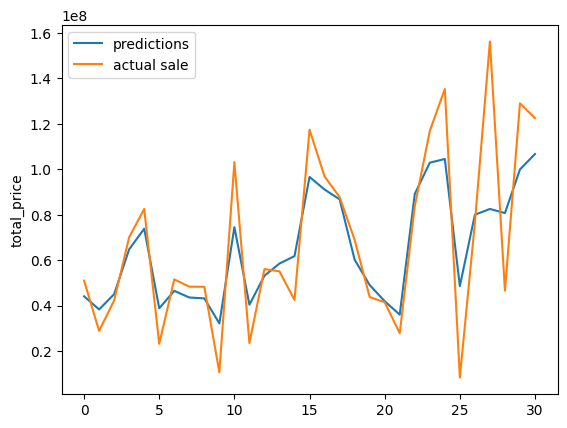

In [204]:
x_month = month[['id_prd_to_plc', 'year', 'month', 'day']]
x_month = scaler.transform(x_month)
sale_predict = modelRFR.predict(x_month)
actual_sale = month['total_price']
lenght = len(sale_predict)
sns.lineplot(x=range(lenght), y=sale_predict, label='predictions')
sns.lineplot(x=range(lenght), y=actual_sale, label='actual sale')
error = np.sqrt(mean_squared_error(actual_sale, sale_predict))
print(f"RMSE: {error}")
plt.legend()

In [205]:
sum_actual_sale = month['total_price'].sum()
sum_predict_sale = sale_predict.sum()
print(f"Actual sale:    {sum_actual_sale}")
print(f"Predicted sale: {sum_predict_sale}")
print(f"Act-pred:      {sum_actual_sale-sum_predict_sale:.0f}")

Actual sale:    2095450000.0
Predicted sale: 2014687782.5
Act-pred:      80762218


## Create future month data

In [168]:
mahe_jadid = {'id_prd_to_plc':[1402, 1402, 1402, 1402, 1402, 1402, 1402, 1402, 1402, 1402,
                               1402, 1402, 1402, 1402, 1402, 1402, 1402, 1402, 1402, 1402,
                               1402, 1402, 1402, 1402, 1402, 1402, 1402, 1402, 1402, 1402],
              
              'year': [2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
                      2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
                      2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],

              'month': [9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
                        9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
                        9, 9, 9, 9, 9, 9, 9, 9, 9, 9],

               'day': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                       11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                       21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                       ]
}
mahe_jadid = pd.DataFrame(mahe_jadid)
mahe_jadid.head()

,id_prd_to_plc,year,month,day
0,1402,2023,9,1
1,1402,2023,9,2
2,1402,2023,9,3
3,1402,2023,9,4
4,1402,2023,9,5


Total sale: 5782125359.0


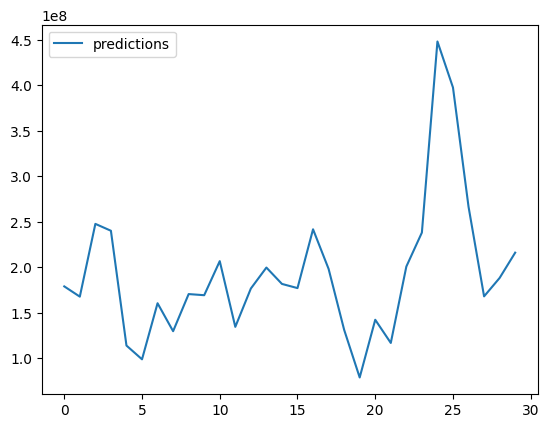

In [170]:
x_new_month = mahe_jadid[['id_prd_to_plc', 'year', 'month', 'day']]
x_new_month = scaler.transform(x_new_month)
sale_predict = modelRFR.predict(x_new_month)
lenght = len(sale_predict)
sns.lineplot(x=range(lenght), y=sale_predict, label='predictions')
print(f"Total sale: {sale_predict.sum()}")
plt.legend()

## Save Model

In [149]:
import pickle 
filename_scaler = "moein_mal_scaler.pickle"
filename_model = "moein_mal_predictor.pickle"

pickle.dump(scaler, open(filename_scaler, "wb"))
pickle.dump(modelRFR, open(filename_model, "wb"))

In [147]:
load_scaler = pickle.load(open(filename, "rb"))